In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [111]:
df = pd.read_csv("C:/Users/DELL/boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [112]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [113]:
df.shape

(506, 14)

In [131]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


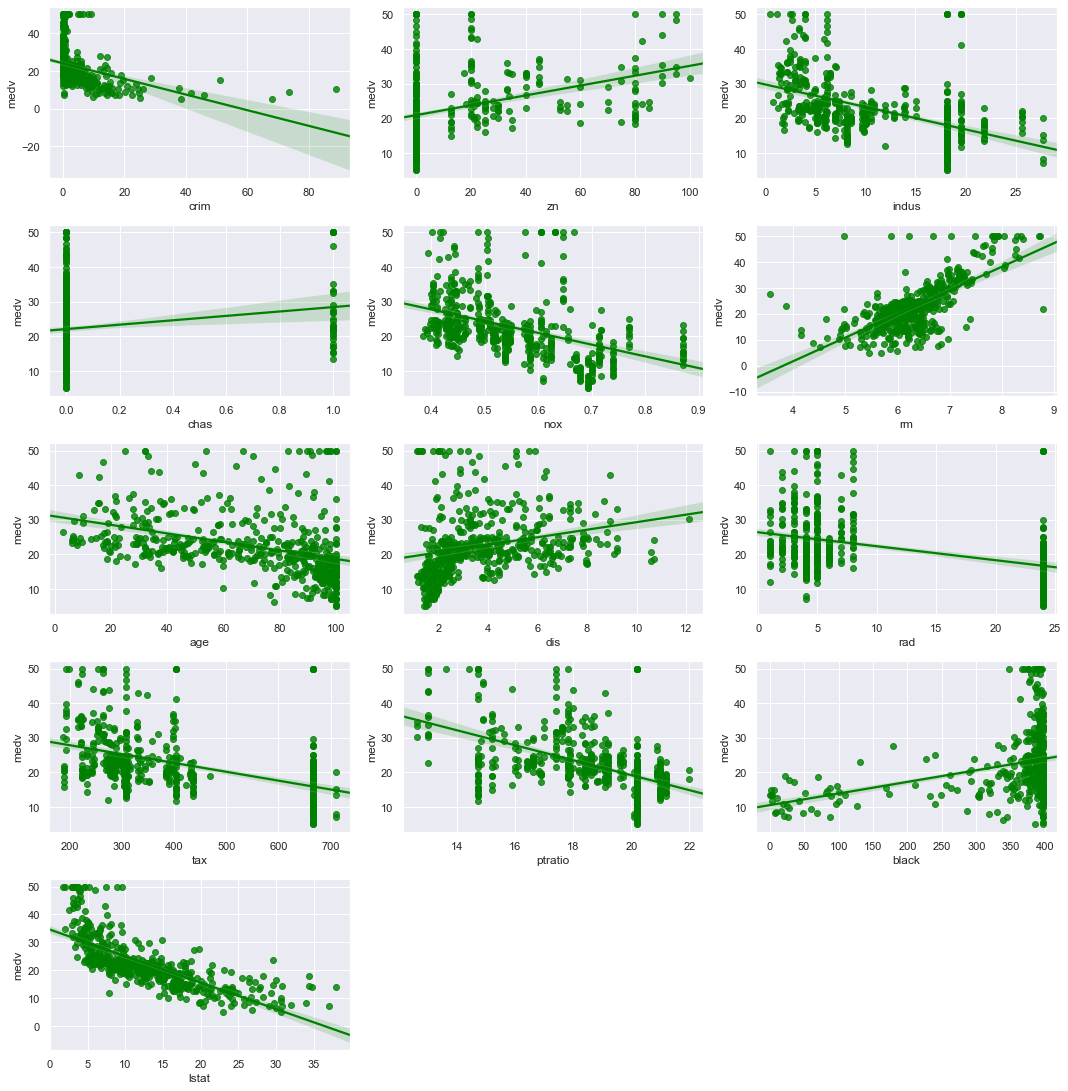

In [116]:
plt.figure(figsize=(15,30))
cnt=1
for i in df.columns[:-1]:
    plt.subplot(10,3,cnt)
    sns.regplot(x=df[i],y=df['medv'], color = 'green')
    cnt=cnt+1
plt.tight_layout()
plt.show()

## Train Test Split 

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df[['crim','zn','indus','chas', 'nox','rm','age','dis','rad','tax','ptratio','black','lstat']], df['medv'], test_size=0.3, random_state=109)

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## Linear Regression

In [120]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
print("Coefficients: ", linreg.coef_) #are these wieghts?
print("Intercept: ", linreg.intercept_) #y intercept?

Coefficients:  [-1.03133900e-01  3.65632976e-02  2.77114127e-02  4.13783638e+00
 -1.90027437e+01  3.91309054e+00  5.34275164e-03 -1.46540944e+00
  2.94941896e-01 -1.17014646e-02 -1.04784869e+00  8.42496832e-03
 -5.19302743e-01]
Intercept:  37.93512737859278


In [122]:
print("Intercept: ", linreg.intercept_) #y intercept?

Intercept:  37.93512737859278


In [133]:
print("Accuracy score for training Data", linreg.score(X_train, y_train))
print("Accuracy score for testing Data", linreg.score(X_test, y_test))

Accuracy score for training Data 0.7455209107362739
Accuracy score for testing Data 0.71619792707725


## Lasso Regression 

In [84]:
lassoreg = Lasso()

In [86]:
lassoreg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
print("Coefficients: ", lassoreg.coef_)

Coefficients:  [-0.06168992  0.03522938 -0.          0.         -0.          1.0255959
  0.02681694 -0.6818589   0.23245202 -0.01322355 -0.89668203  0.00756405
 -0.75983936]


In [90]:
print("Intercept: ",lassoreg.intercept_)

Intercept:  43.2087453541358


In [134]:
print("Accuracy score for training data", lassoreg.score(X_train,y_train))
print("Accuracy score for test Data", lassoreg.score(X_test,y_test))

Accuracy score for training data 0.6843446354697151
Accuracy score for test Data 0.6818863869777807


In [95]:
rijreg = Ridge()

In [96]:
rijreg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
print("Coefficients: ", rijreg.coef_)

Coefficients:  [-9.86336293e-02  3.82954076e-02 -1.13011905e-02  3.86609697e+00
 -9.22033267e+00  3.92374567e+00 -2.30852017e-03 -1.32438295e+00
  2.68939044e-01 -1.23038578e-02 -9.65824346e-01  8.76595065e-03
 -5.32493443e-01]


In [98]:
print("Intercept ", rijreg.intercept_)

Intercept  31.86770204284837


In [99]:
rijreg.score(X_train,y_train)

0.7425078439705688

In [100]:
rijreg.score(X_test,y_test)

0.7149427455802028

## Elastic Net


In [102]:
elnetreg = ElasticNet()
elnetreg.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
print("Coefficients: ", elnetreg.coef_)

Coefficients:  [-0.07764613  0.04150241 -0.00296516  0.         -0.          0.96519338
  0.02762209 -0.77439727  0.27707264 -0.01516616 -0.89666663  0.0076523
 -0.76404989]


In [105]:
print("Intercept: ", elnetreg.intercept_)

Intercept:  44.28771244291262


In [107]:
print("Training Accuracy: ", elnetreg.score(X_train, y_train))

Training Accuracy:  0.6864167624842472


In [108]:
print("Testing Accuracy: ", elnetreg.score(X_test, y_test))

Testing Accuracy:  0.6846721614196415
